In [1]:
#Importing required packages
import pandas as pd
import numpy as np
from scipy import stats, integrate
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

In [2]:
#Loading the datasets - Ultimtely only the train dataset will be used to build and test models.
train = pd.read_csv("C:/Users/phamn_000/Documents/GitHub/project-2/input/train.csv")
test = pd.read_csv("C:/Users/phamn_000/Documents/GitHub/project-2/input/test.csv")

# Revised Exploratory Data Analysis

All of the exploratory data analysis from Project 1 will be conducted again. Some extra analysis will also be done that was recently considered after some lectures/homeworks. This will be necessary to prep the train dataset better for model building.

## Imputation of Missing Variables

In [3]:
#Continuation of Project 1, below are the imputation of missing variables in the train dataset. If reasoning behind imputations
#is required for understanding, can refer back to my Project 1 submission.

train.loc[train.PoolQC.isnull(), "PoolQC"] = "None" #PoolQC
train.loc[train.MiscFeature.isnull(), "MiscFeature"] = "None" #MiscFeature
train.loc[train.Alley.isnull(), "Alley"] = "None" #Alley
train.loc[train.FireplaceQu.isnull(), "FireplaceQu"] = "None" #FireplaceQu
train.loc[train.GarageCond.isnull(), "GarageCond"] = "None"
train.loc[train.GarageType.isnull(), "GarageType"] = "None"
train.loc[train.GarageYrBlt.isnull(), "GarageYrBlt"] = 0.0
train.loc[train.GarageFinish.isnull(), "GarageFinish"] = "None"
train.loc[train.GarageQual.isnull(), "GarageQual"] = "None"
train.loc[train.BsmtExposure.isnull(), "BsmtExposure"] = "None"
train.loc[train.BsmtFinType2.isnull(), "BsmtFinType2"] = "None"
train.loc[train.BsmtFinType1.isnull(), "BsmtFinType1"] = "None"
train.loc[train.BsmtCond.isnull(), "BsmtCond"] = "None"
train.loc[train.BsmtQual.isnull(), "BsmtQual"] = "None"
train.loc[train.Fence.isnull(), "Fence"] = "None" #Fence
train.loc[train.Electrical.isnull(), "Electrical"] = "SBrkr"
train.loc[train.MasVnrArea.isnull(), "MasVnrArea"] = 0.0
train.loc[train.MasVnrType.isnull(), "MasVnrType"] = "None"
train.loc[train.LotFrontage.isnull(), "LotFrontage"] = train["LotFrontage"].median() #replacing null variables with median

In [4]:
#TABLE 1
#Check to see if there are anymore null variables - No there isn't.
null_values = train.isnull().sum().sort_values(ascending = False)
null_values.head(20)

SalePrice       0
Heating         0
RoofStyle       0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
MasVnrArea      0
ExterQual       0
ExterCond       0
Foundation      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
YearRemodAdd    0
dtype: int64

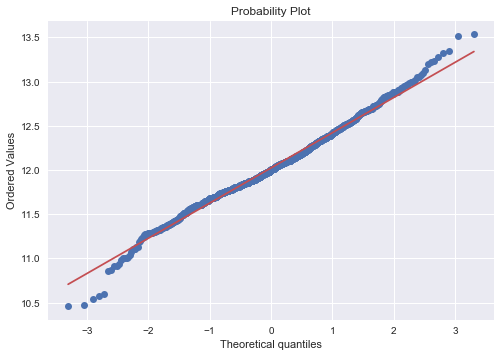

In [5]:
#Know from previous data exploration in Project 1 that the dependent variable SalesPrice does not follow a normal distribution.
#Applying a log transformation to SalesPrice.
train['SalePrice'] = np.log(train['SalePrice'])

#Figure 1 - Check
import pylab
stats.probplot(train["SalePrice"], dist="norm", plot=pylab) #check
pylab.show()

In [6]:
#Calculation mean of SalePrice (since now normalized) for base model
meanSP = train['SalePrice'].mean()
print(meanSP)

12.024050901109373


## Feature Engineering

#### Converting Numerical to Categorical

In [7]:
#Transforming numerical features that are really categorical 
train['MSSubClass'] = train['MSSubClass'].apply(str)
train['OverallCond'] = train['OverallCond'].astype(str)
train['OverallQual'] = train['OverallQual'].astype(str)
train['YrSold'] = train['YrSold'].astype(str)
train['MoSold'] = train['MoSold'].astype(str)
train['YearBuilt'] = train['YearBuilt'].astype(str)
train['YearRemodAdd'] = train['YearRemodAdd'].astype(str)
train['GarageYrBlt'] = train['GarageYrBlt'].astype(str)

#### New Feature - Total Square Footage

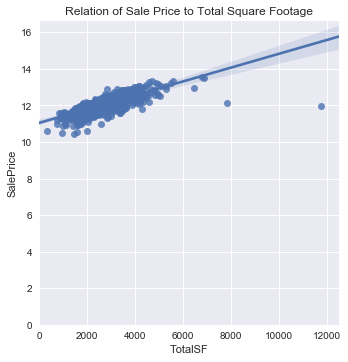

In [8]:
#Creating a Total Square Footage predictor variable
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']

#FIGURE 2
sns.lmplot(x="TotalSF", y="SalePrice", data = train)
plt.title("Relation of Sale Price to Total Square Footage")
plt.xlim(0,)
plt.ylim(0,)
plt.show()

In [9]:
#Separating categorical and numerical features for further pre-processing
num_features = train.select_dtypes(exclude = ['object']).columns
num_features = num_features.drop("SalePrice") #Dropping SalePrice here so don't manipulate it
num_features = num_features.drop("Id")
cat_features = train.select_dtypes(include = ["object"]).columns

#Placing dataframes within variables to work with
train_num = train[num_features]
train_cat = train[cat_features]

#### Correcting for Skewness

In [10]:
#TABLE 2
#Checking skewness of numerical variables because throughout graphing some predictors against SalePrice in
#Project 1, I noticed there was some skewness within data. Did not address it previously so now want to see if it's significant.
from scipy.stats import skew 
skewness = train_num.apply(lambda x: skew(x))

skewness.sort_values(ascending=False)

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.674865
LotFrontage       2.406671
OpenPorchSF       2.361912
TotalSF           1.774874
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
1stFlrSF          1.375342
GrLivArea         1.365156
BsmtUnfSF         0.919323
2ndFlrSF          0.812194
TotRmsAbvGrd      0.675646
HalfBath          0.675203
Fireplaces        0.648898
BsmtFullBath      0.595454
BedroomAbvGr      0.211572
GarageArea        0.179796
FullBath          0.036524
GarageCars       -0.342197
dtype: float64

In [11]:
#Log transform skewed numeric features
skewness = skewness[skewness > 0.00]
skewness = skewness.index

train[skewness] = np.log1p(train[skewness])

#### Getting Dummy Variables

In [12]:
train_cat.shape

(1460, 51)

In [13]:
#Using One Hot Encoding
train_cat = pd.get_dummies(train_cat)
print(train_cat.shape)

(1460, 588)


## Feature Ranking - Determining Importance of Predictor Variables

Will be trying several different methods (for fun and learning). Top predictors across the board will ultimately be used for modelling.

### Using Pearson's Correlation
Filter method for numerical features

In [14]:
#TABLE 3
#Correlation coefficients of predictor variables against SalesPrice - Determining which variables are important relative to the
#target
cc = train.corr()["SalePrice"]
cc[np.argsort(cc, axis=0)[::-1]]

SalePrice        1.000000
TotalSF          0.807140
GrLivArea        0.730254
GarageCars       0.680625
1stFlrSF         0.608955
FullBath         0.580296
TotRmsAbvGrd     0.539998
Fireplaces       0.508925
OpenPorchSF      0.459948
GarageArea       0.454899
MasVnrArea       0.413318
LotArea          0.399923
TotalBsmtSF      0.372838
LotFrontage      0.346237
WoodDeckSF       0.343039
HalfBath         0.320925
BsmtFullBath     0.238945
BsmtUnfSF        0.208233
BsmtFinSF1       0.208099
BedroomAbvGr     0.197665
2ndFlrSF         0.180778
ScreenPorch      0.105858
PoolArea         0.069949
3SsnPorch        0.058827
BsmtHalfBath    -0.004890
Id              -0.017942
BsmtFinSF2      -0.030361
LowQualFinSF    -0.054513
MiscVal         -0.067054
KitchenAbvGr    -0.144278
EnclosedPorch   -0.207263
Name: SalePrice, dtype: float64

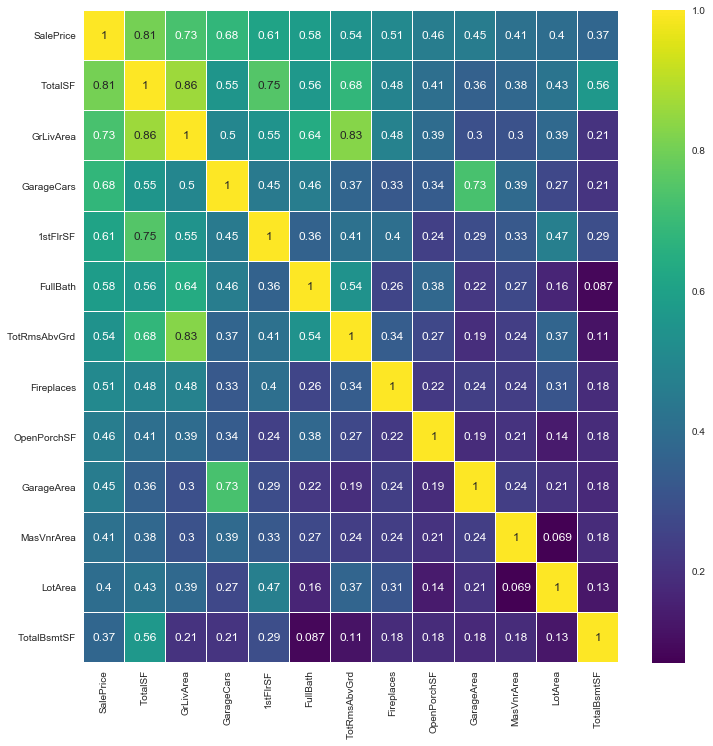

In [15]:
#FIGURE 3
#Heatmap of some predictor variables and Sale Price

quantcorr = train[["SalePrice", "TotalSF", "GrLivArea", "GarageCars", "1stFlrSF", "FullBath", "TotRmsAbvGrd", "Fireplaces",
                  "OpenPorchSF", "GarageArea", "MasVnrArea", "LotArea", "TotalBsmtSF"]].corr()

plt.figure(figsize = (12,12))
sns.heatmap(quantcorr, cmap = 'viridis', annot = True, linewidths = 0.01, linecolor = 'white', )

TotalSF is highly correlated with GrLivArea, 1stFlrSF, TotRmsAbvGrd, and TotalBsmtSF. Might consider just keeping TotalSF and dropping the other 4 from prediction. GarageCars and GarageArea are highly correlated, might consider just keeping GarageCars and dropping GarageArea.

In [16]:
#Concatenate to get back whole train set - without SalePrice and Id
X_1 = pd.concat([train_cat,train_num], axis = 1)

#Put SalePrice into y variable
y = train['SalePrice']

### Using Univariate Analysis

In [17]:
#FIGURE 4
#Use Univariate Analysis to get scores for all 617 features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

selected = SelectKBest(f_regression, k = 30).fit(X_1, y)
X_new = selected.transform(X_1)
scores = selected.scores_

#Score Rankings
print(scores)

[  1.27160059e+01   1.96537774e+01   1.74082443e+01   1.62220840e+01
   4.39343285e+00   1.77226506e+02   5.93123693e-01   1.51630704e+01
   4.52838896e+01   2.80202912e+02   1.41241104e+00   1.68087991e-01
   1.87474763e-03   2.08971133e+00   2.02392383e+01   5.36421941e+01
   2.14146577e+01   7.65816496e+00   1.42999040e+02   2.00172558e+02
   4.81445519e+00   4.81445519e+00   4.10002013e+01   2.59889775e+01
   1.96047846e-01   9.38029134e+01   2.32634888e+01   2.07716187e+00
   1.33508890e+02   1.90074246e+01   1.81613824e+01   2.13507947e+00
   1.48149566e-01   2.32689116e-01   2.32689116e-01   2.31525980e-02
   3.27908536e+01   3.47607116e-02   7.40365237e-01   1.16610823e+01
   1.97139539e+00   1.18942213e+00   9.32519800e-01   2.27984512e+00
   4.89490474e-01   2.33416078e+01   4.62710447e+01   8.37780724e+00
   2.06907926e+01   1.11205107e+01   6.84039394e+01   9.13670706e+00
   8.37479360e+01   3.32727746e+01   2.58252872e+00   4.17035954e+01
   1.40957237e+00   5.48498174e+00

In [18]:
#FIGURE 5
#Extracted column names of features and compared to scores to get most important
features = X_1.columns.get_values()
features.tolist()
print(features)


['MSSubClass_120' 'MSSubClass_160' 'MSSubClass_180' 'MSSubClass_190'
 'MSSubClass_20' 'MSSubClass_30' 'MSSubClass_40' 'MSSubClass_45'
 'MSSubClass_50' 'MSSubClass_60' 'MSSubClass_70' 'MSSubClass_75'
 'MSSubClass_80' 'MSSubClass_85' 'MSSubClass_90' 'MSZoning_C (all)'
 'MSZoning_FV' 'MSZoning_RH' 'MSZoning_RL' 'MSZoning_RM' 'Street_Grvl'
 'Street_Pave' 'Alley_Grvl' 'Alley_None' 'Alley_Pave' 'LotShape_IR1'
 'LotShape_IR2' 'LotShape_IR3' 'LotShape_Reg' 'LandContour_Bnk'
 'LandContour_HLS' 'LandContour_Low' 'LandContour_Lvl' 'Utilities_AllPub'
 'Utilities_NoSeWa' 'LotConfig_Corner' 'LotConfig_CulDSac' 'LotConfig_FR2'
 'LotConfig_FR3' 'LotConfig_Inside' 'LandSlope_Gtl' 'LandSlope_Mod'
 'LandSlope_Sev' 'Neighborhood_Blmngtn' 'Neighborhood_Blueste'
 'Neighborhood_BrDale' 'Neighborhood_BrkSide' 'Neighborhood_ClearCr'
 'Neighborhood_CollgCr' 'Neighborhood_Crawfor' 'Neighborhood_Edwards'
 'Neighborhood_Gilbert' 'Neighborhood_IDOTRR' 'Neighborhood_MeadowV'
 'Neighborhood_Mitchel' 'Neighborhood_NAm

### Using Random Forest

In [19]:
#FIGURE 6
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

#Creating a RF regressor
model_RF_FS = RandomForestRegressor(random_state = 100)
#Training Regressor
model_RF_FS.fit(X_1, y)

#Printing feature name as well as its gini importance
for f in zip(features, model_RF_FS.feature_importances_):
    print(f)

('MSSubClass_120', 1.2427914587212358e-05)
('MSSubClass_160', 3.7915517760812491e-07)
('MSSubClass_180', 2.1734342752213637e-05)
('MSSubClass_190', 9.4315800410790328e-06)
('MSSubClass_20', 0.00065932653896108302)
('MSSubClass_30', 0.00064532430526741764)
('MSSubClass_40', 0.0)
('MSSubClass_45', 1.2683729684367438e-10)
('MSSubClass_50', 0.00025484289909369589)
('MSSubClass_60', 0.00031778623977578741)
('MSSubClass_70', 0.00016334017517101346)
('MSSubClass_75', 7.4430366143160862e-06)
('MSSubClass_80', 9.114025017181511e-07)
('MSSubClass_85', 2.0109343190788124e-06)
('MSSubClass_90', 2.3038535010090628e-05)
('MSZoning_C (all)', 0.00095825479978657536)
('MSZoning_FV', 6.4853359293264098e-06)
('MSZoning_RH', 1.1610769282118469e-05)
('MSZoning_RL', 0.00036317771006786031)
('MSZoning_RM', 0.0011862492510410049)
('Street_Grvl', 0.0)
('Street_Pave', 0.0)
('Alley_Grvl', 2.4642407291750272e-05)
('Alley_None', 4.1337716552392326e-05)
('Alley_Pave', 2.4031010272044616e-05)
('LotShape_IR1', 0.0004

('TotalBsmtSF', 0.004235047423941078)
('1stFlrSF', 0.0064265070214499249)
('2ndFlrSF', 0.0053122544400917762)
('LowQualFinSF', 6.1291275841767173e-05)
('GrLivArea', 0.011351052451576828)
('BsmtFullBath', 0.0010330753325493104)
('BsmtHalfBath', 0.0001104489216312649)
('FullBath', 0.0069579490929977464)
('HalfBath', 0.0012252552868085476)
('BedroomAbvGr', 0.0017772329986097141)
('KitchenAbvGr', 0.008532978549278163)
('TotRmsAbvGrd', 0.0026934245867968202)
('Fireplaces', 0.00096445874934593672)
('GarageCars', 0.031503811397328843)
('GarageArea', 0.02915750209647533)
('WoodDeckSF', 0.0017010006764019033)
('OpenPorchSF', 0.00258795041281123)
('EnclosedPorch', 0.001710882445555436)
('3SsnPorch', 4.9489829489074684e-05)
('ScreenPorch', 0.00058720892521451761)
('PoolArea', 4.2487420240618662e-07)
('MiscVal', 2.4438759749103787e-05)
('TotalSF', 0.64952428799108353)


In [20]:
#Using Random Forest Regressor to select the best features (importance of more than 0.004)
sfm = SelectFromModel(model_RF_FS, threshold = 0.004)
#Training selector
sfm.fit(X_1, y)

#Printing most important features
for s in sfm.get_support(indices = True):
    print(features[s])

ExterQual_TA
Foundation_PConc
BsmtQual_Gd
BsmtQual_TA
CentralAir_N
CentralAir_Y
KitchenQual_Gd
KitchenQual_TA
LotFrontage
LotArea
BsmtFinSF1
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
GrLivArea
FullBath
KitchenAbvGr
GarageCars
GarageArea
TotalSF


In [21]:
#TABLE 4
#Ranking of Importance of Top 20 Features
impt = pd.DataFrame({
    'Feature': ['TotalSF','ExterQual_TA', 'GarageCars', 'GarageArea', 'KitchenQual_TA', 'BsmtFinSF1', 'GrLivArea',
               'CentralAir_Y', 'BsmtQual_Gd', 'BsmtQual_TA', 'CentralAir_N', 'LotArea', 'BsmtUnfSF', '1stFlrSF',
               '2ndFlrSF', 'FullBath', 'KitchenAbvGr', 'Foundation_PConc', 'KitchenQual_Gd', 'LotFrontage', 'TotalBsmtSF'],
    'Importance': [0.64952, 0.04134, 0.0315, 0.02915, 0.01518, 0.01195, 0.01135, 0.01038, 0.00941, 0.00525, 0.00814, 0.00642,
                  0.00697, 0.00642, 0.00531, 0.00695, 0.00853, 0.00438, 0.00427, 0.00497, 0.00423]})

impt.sort_values(by='Importance', ascending=False)


,Feature,Importance
0,TotalSF,0.64952
1,ExterQual_TA,0.04134
2,GarageCars,0.03150
3,GarageArea,0.02915
4,KitchenQual_TA,0.01518
5,BsmtFinSF1,0.01195
6,GrLivArea,0.01135
7,CentralAir_Y,0.01038
8,BsmtQual_Gd,0.00941
16,KitchenAbvGr,0.00853


## Feature Selection

Based off of Pearson's Correlation matrix as well as Univariate Feature Selection and Random Forest Regressor results.

In [22]:
#TABLE 5
#Overall Quality
train_OverallQual = pd.get_dummies(train[['OverallQual']])
train_OverallQual.head()

,OverallQual_1,OverallQual_10,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,1,0


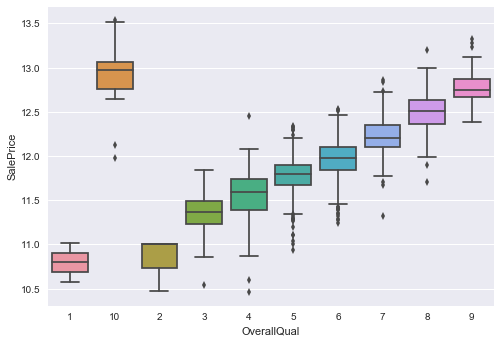

In [23]:
#FIGURE 7
#Boxplot of OverallQual vs. SalePrice - Unsure why OverallQual_10 was listed after OverallQual_1
sns.boxplot(x="OverallQual", y="SalePrice", data=train)

In [24]:
#TABLE 6
#Exterior Quality
train_ExQual = pd.get_dummies(train[['ExterQual']])
train_ExQual.head()

,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA
0,0,0,1,0
1,0,0,0,1
2,0,0,1,0
3,0,0,0,1
4,0,0,1,0


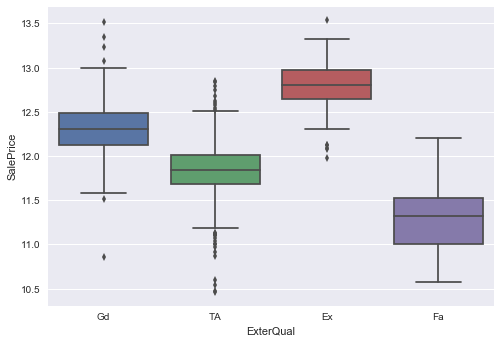

In [25]:
#FIGURE 8
#Boxplot of ExterQual vs. SalePrice
sns.boxplot(x="ExterQual", y="SalePrice", data=train)

In [26]:
#TABLE 7
#HeatingQC
train_HeatingQC = pd.get_dummies(train[['HeatingQC']])
train_HeatingQC.head()

,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,0,0,1,0,0
4,1,0,0,0,0


In [27]:
#TABLE 8
#Heating
train_Heating = pd.get_dummies(train[['Heating']])
train_Heating.head()

,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0


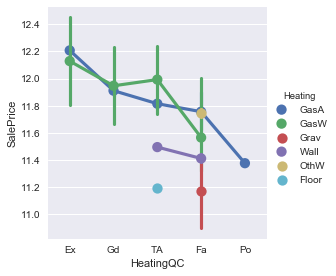

In [28]:
#FIGURE 9
#Factorplot of HeatingQC vs. SalePrice with Heating type as a color filter.
#GasA = Gas forced warm air furnace; GasW = Gas hot water or streamed heat.
sns.factorplot(x="HeatingQC", y="SalePrice", hue="Heating", data=train)

In [29]:
#TABLE 9
#Kithcen Quality
train_KitchenQual = pd.get_dummies(train[['KitchenQual']])
train_KitchenQual.head()

,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA
0,0,0,1,0
1,0,0,0,1
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [30]:
#TABLE 10
#Creating new X with chosen features
X = pd.concat([train[['TotalSF','GrLivArea','GarageCars','1stFlrSF', 'FullBath', 'GarageArea', 'TotalBsmtSF', 'TotRmsAbvGrd',
                     'Fireplaces', 'MasVnrArea']], train_OverallQual, train_ExQual, train_HeatingQC, train_Heating,
                       train_KitchenQual], axis=1)
X.head()


,TotalSF,GrLivArea,GarageCars,1stFlrSF,FullBath,GarageArea,TotalBsmtSF,TotRmsAbvGrd,Fireplaces,MasVnrArea,...,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA
0,7.850493,7.444833,2,6.753438,1.098612,6.308098,6.753438,2.197225,0.000000,5.283204,...,0,1,0,0,0,0,0,0,1,0
1,7.833996,7.141245,2,7.141245,1.098612,6.133398,7.141245,1.945910,0.693147,0.000000,...,0,1,0,0,0,0,0,0,0,1
2,7.903596,7.488294,2,6.825460,1.098612,6.411818,6.825460,1.945910,0.693147,5.093750,...,0,1,0,0,0,0,0,0,1,0
3,7.813592,7.448916,3,6.869014,0.693147,6.466145,6.629363,2.079442,0.693147,0.000000,...,0,1,0,0,0,0,0,0,1,0
4,8.114923,7.695758,3,7.044033,1.098612,6.729824,7.044033,2.302585,0.693147,5.860786,...,0,1,0,0,0,0,0,0,1,0


## Modelling

### Baseline Model - The Mean Model
Having the predicted SalePrice be the average SalePrice. Using the average here because SalePrice has already been normalized so there are no extreme variables and thus the median does not need to be used.

In [31]:
#TABLE 11
#Creating a new column called PredMeanSP that has the mean of SalePrice column in it
train['PredMeanSP'] = meanSP
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,PredMeanSP
0,1,60,RL,4.189655,9.042040,Pave,None,Reg,Lvl,AllPub,...,None,None,0.0,2,2008,WD,Normal,12.247694,7.850493,12.024051
1,2,20,RL,4.394449,9.169623,Pave,None,Reg,Lvl,AllPub,...,None,None,0.0,5,2007,WD,Normal,12.109011,7.833996,12.024051
2,3,60,RL,4.234107,9.328212,Pave,None,IR1,Lvl,AllPub,...,None,None,0.0,9,2008,WD,Normal,12.317167,7.903596,12.024051
3,4,70,RL,4.110874,9.164401,Pave,None,IR1,Lvl,AllPub,...,None,None,0.0,2,2006,WD,Abnorml,11.849398,7.813592,12.024051
4,5,60,RL,4.442651,9.565284,Pave,None,IR1,Lvl,AllPub,...,None,None,0.0,12,2008,WD,Normal,12.429216,8.114923,12.024051


In [42]:
#Calculating accuracy metric for baseline model (using average SalePrice as the prediction)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

#Splitting train dataset in a similar 80/20 split to get comparable results with the actual models
train_X_b, test_X_b, train_y_b, test_y_b = train_test_split(train['SalePrice'], train['PredMeanSP'], 
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=100)
#Print Train Metric Scores
B_RMSE_train = sqrt(mean_squared_error(train_X_b, train_y_b))
print('Baseline Train RMSE: ', B_RMSE_train)

B_RMSE_test = sqrt(mean_squared_error(test_X_b, test_y_b))
print('Baseline Test RMSE: ', RF_RMSE_test)

Baseline Train RMSE:  0.3953145269457939
Baseline Test RMSE:  0.16115279282667522


### Cross Validation

In [33]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=100)

print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(1168, 39) (292, 39) (1168,) (292,)


In [34]:
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

### Random Forest Regressor

In [38]:
#Random forest classifier with n_estimators=10 (default)
from sklearn.ensemble import RandomForestRegressor

#initializing model with selected parameters
model_RF = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 1, max_features = 'auto', random_state = 100)      
model_RF.fit(train_X, train_y)

#Predicting Train Set
pred_RF_1 = model_RF.predict(train_X)
#Predicting Test Set
pred_RF_2 = model_RF.predict(test_X)

#Print Train Metric Scores
RF_RMSE_train = sqrt(mean_squared_error(train_y, pred_RF_1))
print('Train RMSE: ', RF_RMSE_train)

RF_RMSE_test = sqrt(mean_squared_error(test_y, pred_RF_2))
print('Test RMSE: ', RF_RMSE_test)

Train RMSE:  0.06494937437366988
Test RMSE:  0.16115279282667522


#### Linear Regression

In [39]:
from sklearn.linear_model import LinearRegression

#initializing model
model_lr = LinearRegression()
model_lr.fit(train_X, train_y)

#Predicting Train Set
pred_lr_train = model_lr.predict(train_X)
#Predicting Test Set
pred_lr_test = model_lr.predict(test_X)

#Print Train and Test Metric Scores
LR_RMSE_train = sqrt(mean_squared_error(train_y, pred_lr_train))
print('Train RMSE: ', LR_RMSE_train)

LR_RMSE_test = sqrt(mean_squared_error(test_y, pred_lr_test))
print('Test RMSE: ', LR_RMSE_test)

Train RMSE:  0.15947341359651798
Test RMSE:  0.15528555958745666


#### Ridge Regression

In [40]:
from sklearn.linear_model import Ridge

#initializing model
model_rr = Ridge()
model_rr.fit(train_X, train_y)

#Predicting Train Set
pred_rr_train = model_rr.predict(train_X)
#Predicting Test Set
pred_rr_test =  model_rr.predict(test_X)

#Print Train and Test Metric Scores
RR_RMSE_train = sqrt(mean_squared_error(train_y, pred_rr_train))
print('Train RMSE: ', RR_RMSE_train)

RR_RMSE_test = sqrt(mean_squared_error(test_y, pred_rr_test))
print('Test RMSE: ', RR_RMSE_test)

Train RMSE:  0.15990681981797572
Test RMSE:  0.15370597408708478
